In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
data = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [11]:
# return unique values from an numpy array 
# np.unique(data['City'].values)

In [38]:
# Extrating year and month from data
# pd.to_datetime converts arguement to datetime 
# DatetimeIndex creates timestamp objects - split to date time format and generate datetime format 

# type(data['month'].iloc[0])

# year month columns are created to be filled with numpy inte64 values, while city column has str values 
data['year'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).year
data['month'] = pd.DatetimeIndex(pd.to_datetime(data['dt'])).month

In [42]:
# only consider Los Angeles in October across years 
data = data[data['City'] == 'Los Angeles']
data = data[data['month'] == 10]
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,month
131855,1849-10-01,16.549,2.177,Los Angeles,United States,34.56N,118.70W,1849,10
131867,1850-10-01,17.577,1.318,Los Angeles,United States,34.56N,118.70W,1850,10
131879,1851-10-01,16.963,2.856,Los Angeles,United States,34.56N,118.70W,1851,10
131891,1852-10-01,15.792,1.630,Los Angeles,United States,34.56N,118.70W,1852,10
131903,1853-10-01,17.851,3.069,Los Angeles,United States,34.56N,118.70W,1853,10


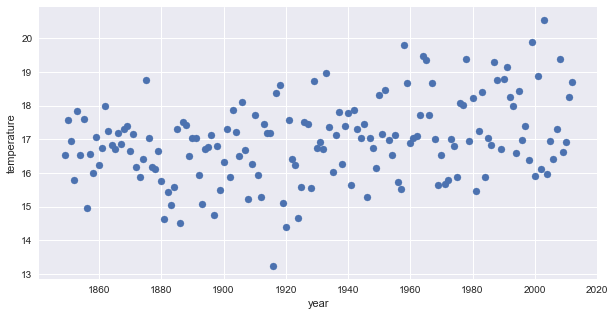

In [49]:
# a linear trend can be seen from the plot 
figure = plt.figure(figsize = (10,5))
plt.scatter(x = data['year'], y = data['AverageTemperature'])
plt.ylabel('temperature')
plt.xlabel('year')
plt.show()

#### simple linear regression, regularization and gradient descent 

Regularization is like adding a penalty term with regularization term lambda to the cost function and gradinet descent follows as usual.
The goal is to find the weights that minimizes the regularized cost function 

$$
E(m,b) =  \frac{1}{2N} \sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2
$$

Regularization is a very important technique in machine learning to prevent overfitting and ensure that the model generalizes well to new data. Generally, there are two forms of regularization - L1 and L2. 

####  With L1 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{2N} + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


#### With L2 Regularization:

$$
E(m,b) =  \frac{1}{2N} \big(\sum_{i=1}^n\big(y_i - (m x_i + b )\big)^2 + \lambda \parallel m \parallel^2\big)
$$

$$
\frac{d}{db} = \frac{1}{N} \sum_{i=1}^n -\big(y_i - (m x_i + b )\big)
$$

$$
\frac{d}{dm} = \frac{\lambda}{N} m + \frac{1}{N} \sum_{i=1}^n -x_i\big(y_i - (m x_i + b )\big)
$$


The partial derivative with respect to the intercept b does not vary with regularization.